     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Accuracy: 0.9827709978463748


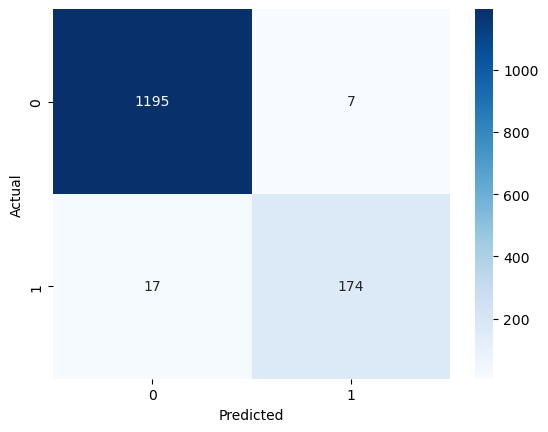

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data, specifying the encoding of the file
data = pd.read_csv('spam.csv', encoding='utf-8')

# Print the first few rows of the data
print(data.head())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size=0.25, random_state=42)

# Create a count vectorizer
vectorizer = CountVectorizer(stop_words='english')

# Transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Transform the test data
X_test_vec = vectorizer.transform(X_test)

# Make predictions on the test data
y_pred = clf.predict(X_test_vec)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the classifier
print('Accuracy:', accuracy)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()